#UC Berkley
#Post Graduate Program in AI and Machine Learning
## Assignment 5.1: Will the Customer Accept the Coupon?
### Student Name : Rahul Tantak
This work represents the graded assignment delivered by
*   [_Rahul Tantak_](mailto:rahul.tantak@gmail.com)

###Course Instructor :
*   _Piyush Athawale_


#Assignment details
The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those who did not.

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).
####Deliverables
  * Git Repository https://github.com/rahultantak/couponsEDA

  **Status**: _Submitted on 05-02-2026_


In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

1. Read in the `coupons.csv` file.




In [72]:
data = pd.read_csv('data/coupons.csv')

In [73]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [74]:
#Check total size of the data (Rows, Columns)
data.shape

(12684, 26)

In [75]:
#Check the data types of the columns

# Loop through the columns and print each column name and dtype

pd.pandas.set_option('display.max_columns', None)

numeric_count = 0
categorical_count = 0

for col, dtype in data.dtypes.items():
  print(f"Column: {col}, DataType: {dtype}")
  if dtype in ['int64', 'float64']:
    numeric_count += 1
  elif dtype == 'object':
    categorical_count += 1

print(f"\n-----------------------------------------")
print(f"Total number of numeric columns : {numeric_count}")
print(f"Total number of categorical columns : {categorical_count}")
print(f"-----------------------------------------")

Column: destination, DataType: object
Column: passanger, DataType: object
Column: weather, DataType: object
Column: temperature, DataType: int64
Column: time, DataType: object
Column: coupon, DataType: object
Column: expiration, DataType: object
Column: gender, DataType: object
Column: age, DataType: object
Column: maritalStatus, DataType: object
Column: has_children, DataType: int64
Column: education, DataType: object
Column: occupation, DataType: object
Column: income, DataType: object
Column: car, DataType: object
Column: Bar, DataType: object
Column: CoffeeHouse, DataType: object
Column: CarryAway, DataType: object
Column: RestaurantLessThan20, DataType: object
Column: Restaurant20To50, DataType: object
Column: toCoupon_GEQ5min, DataType: int64
Column: toCoupon_GEQ15min, DataType: int64
Column: toCoupon_GEQ25min, DataType: int64
Column: direction_same, DataType: int64
Column: direction_opp, DataType: int64
Column: Y, DataType: int64

-----------------------------------------
Total 

In [76]:
# Check if any duplicate values found
num_duplicates = data.duplicated().sum()

if num_duplicates > 0:
  print(f"{num_duplicates} duplicate rows found.")
else:
  print("No duplicate rows found.")

data_clean = data.drop_duplicates()

74 duplicate rows found.


In [77]:
# Check for missing / null values per column
null_counts = data_clean.isnull().sum()

# Filter for columns with at least one null value
columns_with_nulls = null_counts[null_counts > 0]

print(f"-----------------------------------------\nTotal number of columns that have null values: {len(columns_with_nulls)}")
print("\nColumns with null values and their counts:")
display(columns_with_nulls)

print("\nTotal number of null values in the DataFrame:")
print(null_counts.sum())

-----------------------------------------
Total number of columns that have null values: 6

Columns with null values and their counts:


,0
car,12502
Bar,107
CoffeeHouse,217
CarryAway,150
RestaurantLessThan20,129
Restaurant20To50,189



Total number of null values in the DataFrame:
13294


/tmp/ipython-input-1511066844.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=columns_with_nulls.index, y=columns_with_nulls.values, palette='viridis')


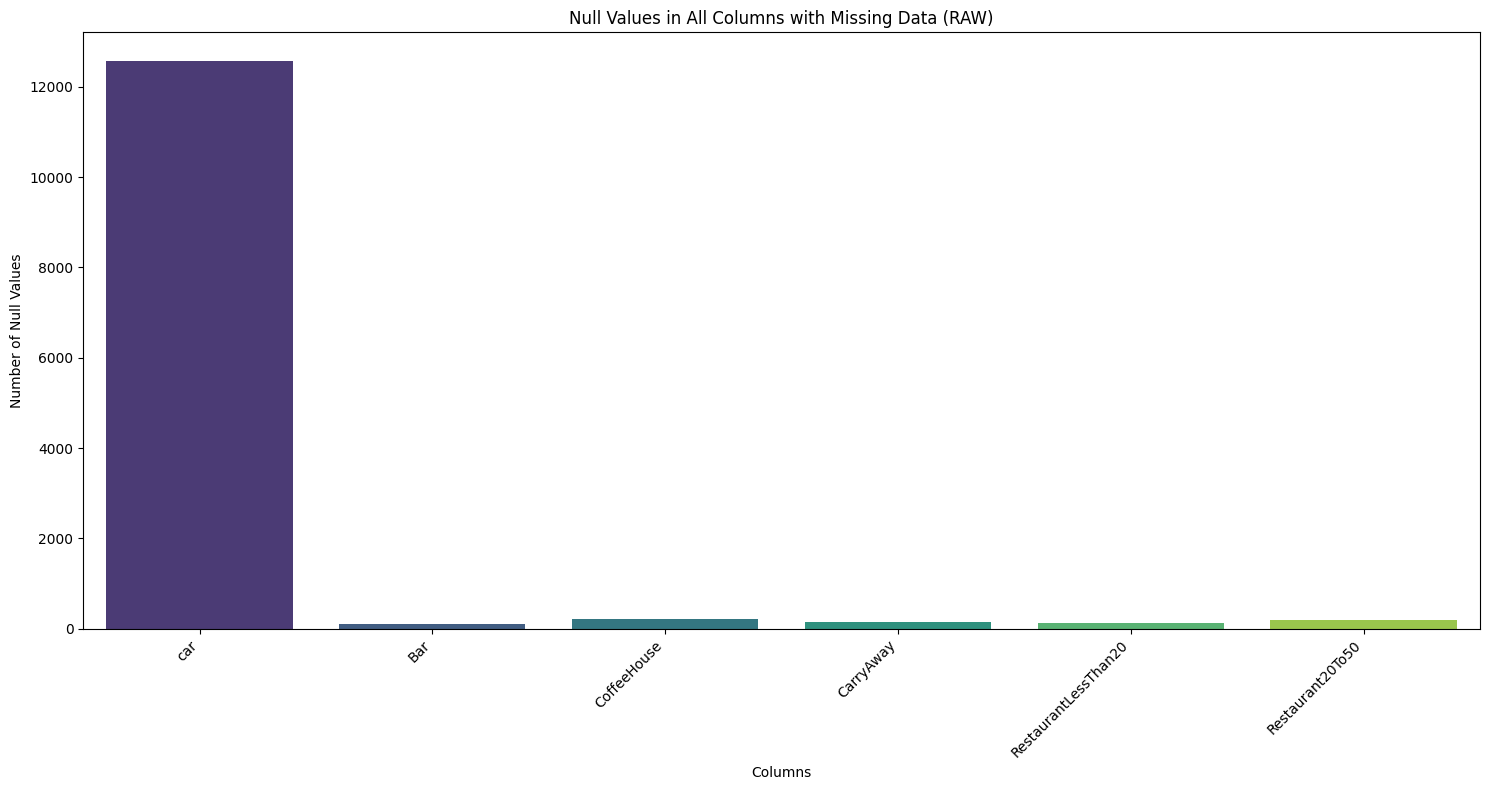

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use the columns_with_nulls variable which contains all columns with nulls
# from the previous step (cell OnOKpGjsN9kv)
# Select only columns with at least one null value
columns_with_nulls = data.isnull().sum()
columns_with_nulls = columns_with_nulls[columns_with_nulls > 0]


if not columns_with_nulls.empty:
    plt.figure(figsize=(15, 8))

    sns.barplot(x=columns_with_nulls.index, y=columns_with_nulls.values, palette='viridis')
    plt.xticks(rotation=45, ha='right')
    plt.title('Null Values in All Columns with Missing Data (RAW)')
    plt.xlabel('Columns')
    plt.ylabel('Number of Null Values')
    plt.tight_layout()
    plt.show()
else:
    print("No columns with null values found.")

In [79]:
## Find the percentage of null values present in each column
## 1 -step make the list of features which has missing values

columns_with_na=[columns for columns in data.columns if data[columns].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for column in columns_with_na:
    print(column, np.round((data[column].isnull().mean())*100, 2),  ' % missing values')

car 99.15  % missing values
Bar 0.84  % missing values
CoffeeHouse 1.71  % missing values
CarryAway 1.19  % missing values
RestaurantLessThan20 1.02  % missing values
Restaurant20To50 1.49  % missing values


* Looking at above null check result, 5 columns have very less null values ~1-2%.
* Column 'car' seems to have most values null 99% - We may need to drop it. But before that we will view the data distrubition

/tmp/ipython-input-3397018189.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=temp_series.index, y=temp_series.values, palette='viridis')


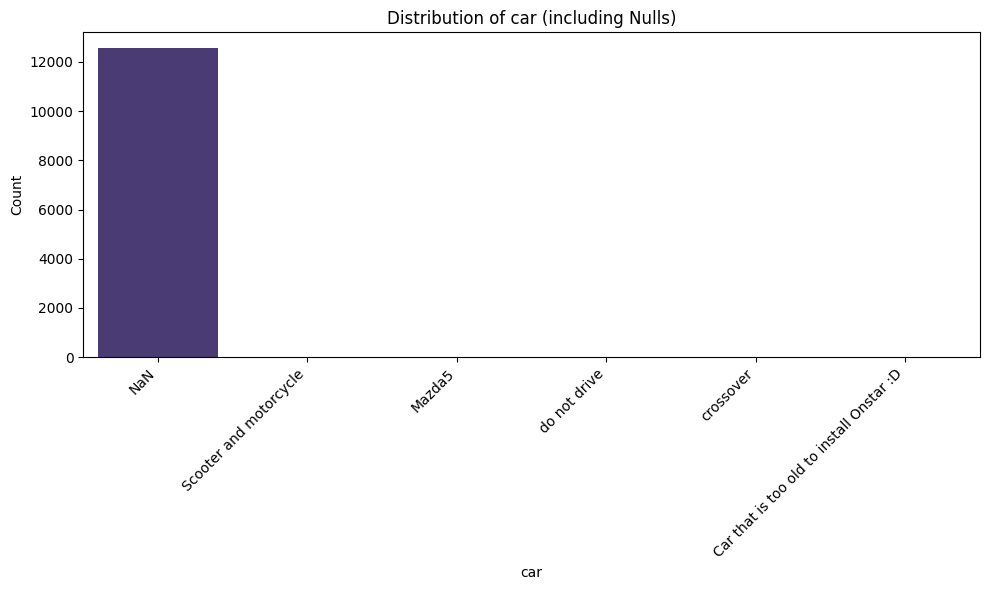

/tmp/ipython-input-3397018189.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=temp_series.index, y=temp_series.values, palette='viridis')


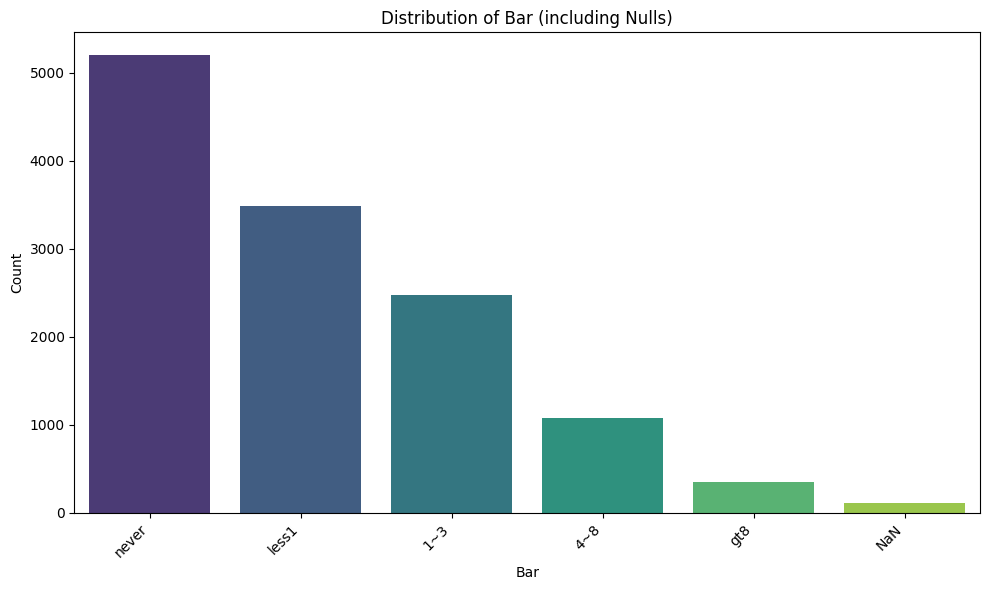

/tmp/ipython-input-3397018189.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=temp_series.index, y=temp_series.values, palette='viridis')


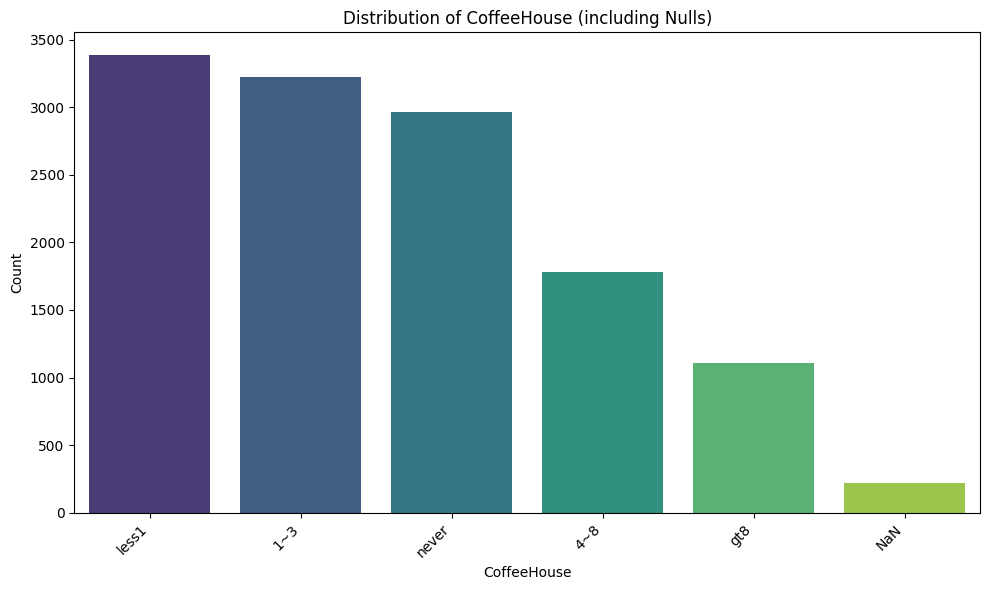

/tmp/ipython-input-3397018189.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=temp_series.index, y=temp_series.values, palette='viridis')


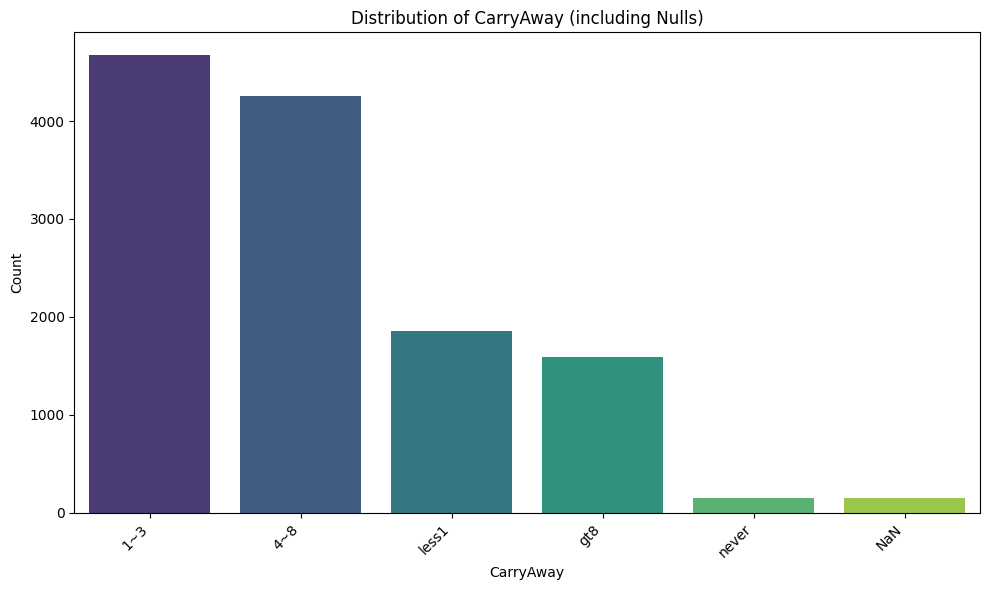

/tmp/ipython-input-3397018189.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=temp_series.index, y=temp_series.values, palette='viridis')


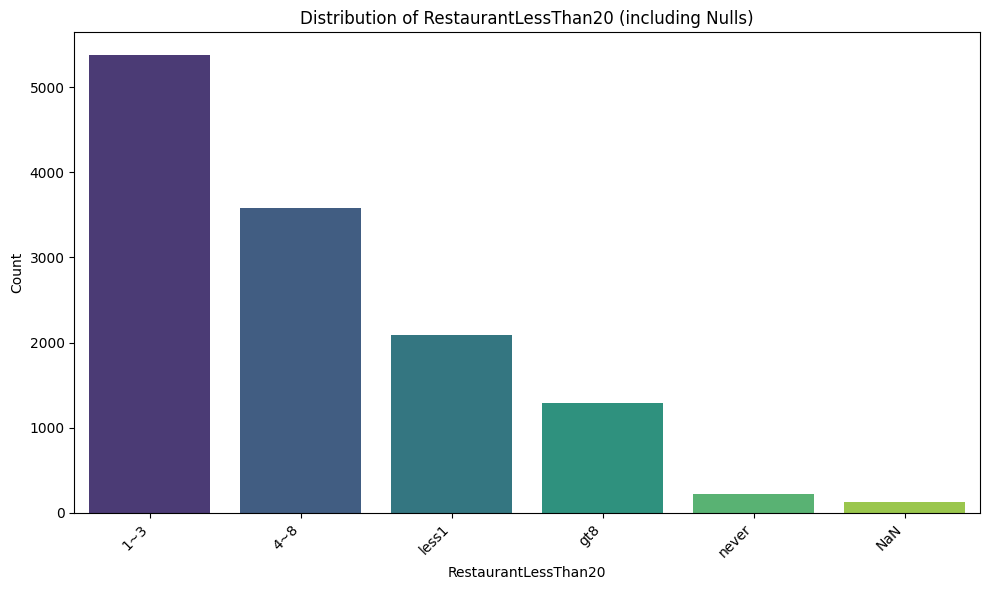

/tmp/ipython-input-3397018189.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=temp_series.index, y=temp_series.values, palette='viridis')


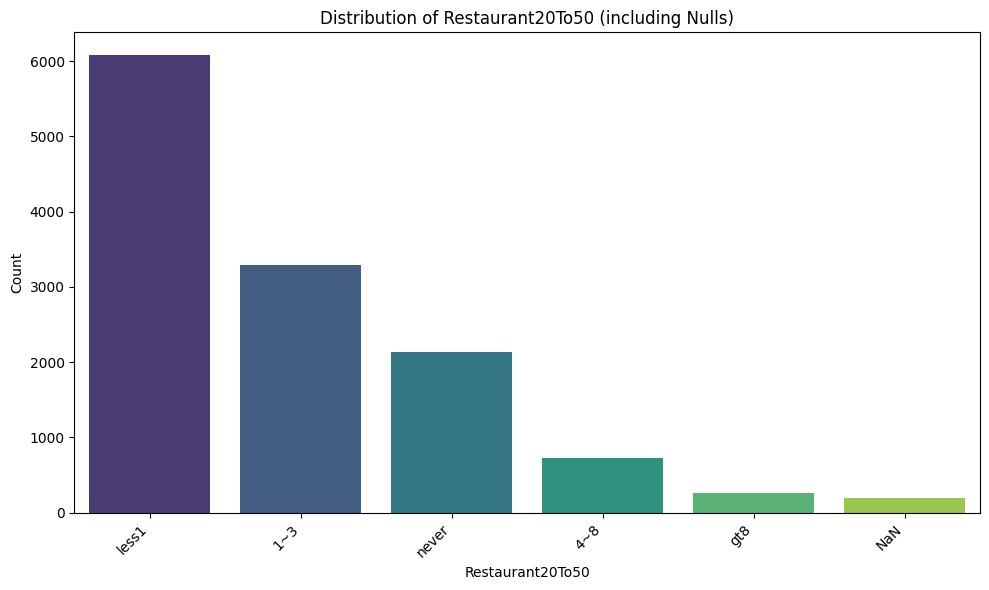

In [80]:
for column in columns_with_na:
    if data[column].dtype == 'object': # Ensure it's a categorical column
        plt.figure(figsize=(10, 6))
        # Use fillna('NaN') to explicitly label NaN values as 'NaN' string
        # Then use value_counts() which will now include 'NaN' as a category
        temp_series = data[column].fillna('NaN').value_counts()
        sns.barplot(x=temp_series.index, y=temp_series.values, palette='viridis')
        plt.xticks(rotation=45, ha='right')
        plt.title(f'Distribution of {column} (including Nulls)')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Skipping {column} as it's not a categorical column.")

3. Decide what to do about your missing data -- drop, replace, other...

In [81]:
#Drop the 74 duplicate rows and save into data_clean
data_clean = data.drop_duplicates()

In [82]:
#Drop Column 'car' as it is not much of use due to almost all null values
if 'car' in data_clean.columns:
    data_clean = data_clean.drop('car', axis=1)

In [83]:
#drop null value rows from remaining columns
data_clean = data_clean.dropna()

In [84]:
#Data is now clean with no nulls and 'car' column dropped
data_clean.isnull().sum()

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


4. What proportion of the total observations chose to accept the coupon?

5. Use a bar plot to visualize the `coupon` column.

/tmp/ipython-input-1973425529.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_clean, x='coupon', palette='viridis')


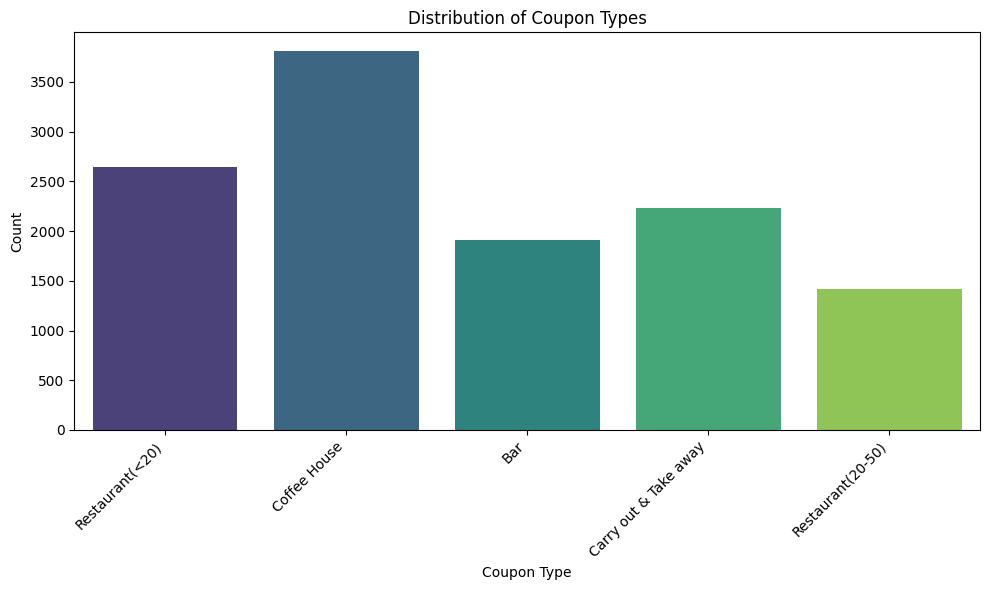

In [85]:
#Bar plot of 'coupon' column
plt.figure(figsize=(10, 6))
sns.countplot(data=data_clean, x='coupon', palette='viridis')
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

6. Use a histogram to visualize the temperature column.

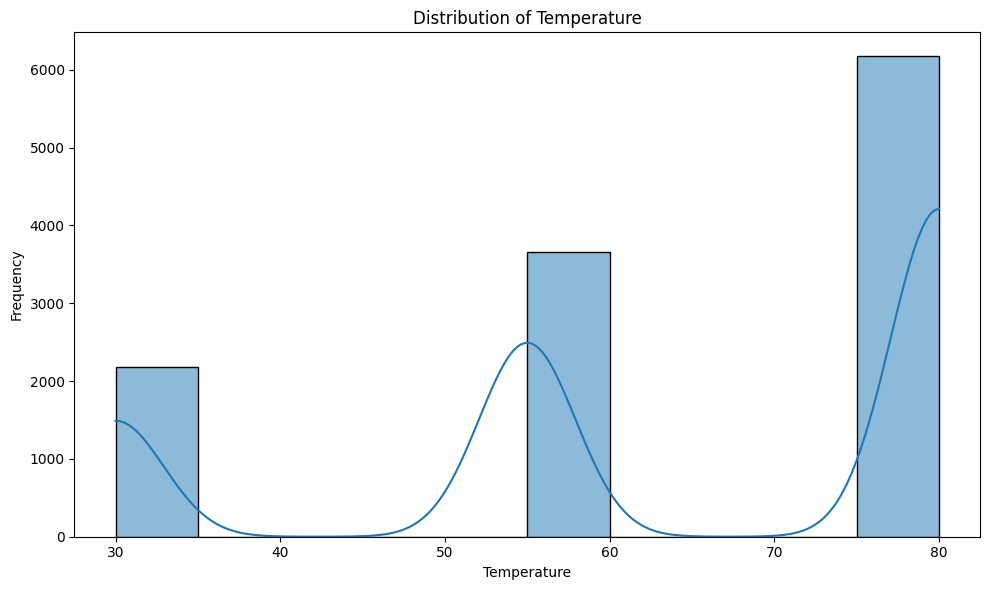

In [86]:
# Histogram of temperature column
plt.figure(figsize=(10, 6))
sns.histplot(data=data_clean, x='temperature', bins=10, kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.

In [87]:
data_bar_coupons = data_clean[data_clean['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?

In [88]:
bar_coupon_acceptance_proportion = data_bar_coupons['Y'].mean()
print(f"Proportion of bar coupons accepted: {bar_coupon_acceptance_proportion:.2f}")

Proportion of bar coupons accepted: 0.41


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [89]:
# Define a function to categorize bar visitation frequency
def categorize_bar_frequency(frequency):
    if frequency in ['never', 'less1', '1~3']:
        return '3 or fewer times/month'
    elif frequency in ['4~8', 'gt8']:
        return 'more than 3 times/month'
    else:
        return 'unknown'

# Apply the categorization to create a new column
data_bar_coupons['bar_frequency_category'] = data_bar_coupons['Bar'].apply(categorize_bar_frequency)

# Calculate acceptance rates for each category
acceptance_by_frequency = data_bar_coupons.groupby('bar_frequency_category')['Y'].mean().reset_index()

print("Acceptance rate of bar coupons by bar visitation frequency:")
display(acceptance_by_frequency)

Acceptance rate of bar coupons by bar visitation frequency:


/tmp/ipython-input-3767443044.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bar_coupons['bar_frequency_category'] = data_bar_coupons['Bar'].apply(categorize_bar_frequency)


,bar_frequency_category,Y
0,3 or fewer times/month,0.372446
1,more than 3 times/month,0.761658


/tmp/ipython-input-819313835.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='bar_frequency_category', y='Y', data=acceptance_by_frequency, palette='coolwarm')


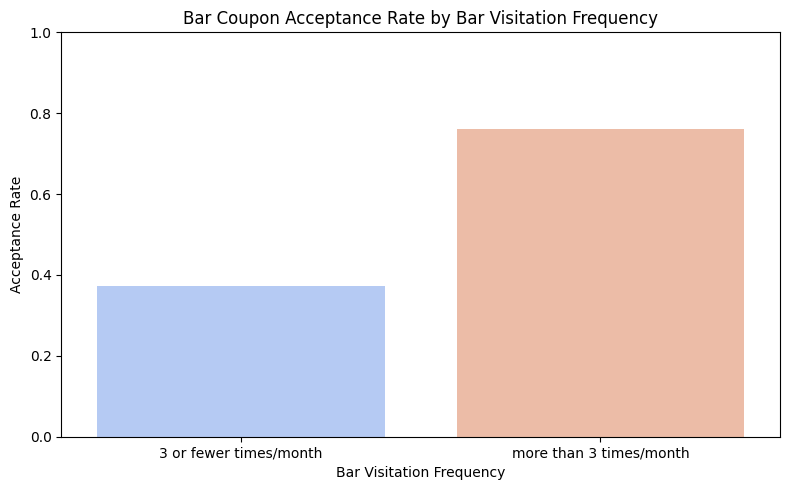

In [90]:
# Visualize the acceptance rates
plt.figure(figsize=(8, 5))
sns.barplot(x='bar_frequency_category', y='Y', data=acceptance_by_frequency, palette='coolwarm')
plt.title('Bar Coupon Acceptance Rate by Bar Visitation Frequency')
plt.xlabel('Bar Visitation Frequency')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1) # Set y-axis limits from 0 to 1 for proportion
plt.tight_layout()
plt.show()

We see that the coupon acceptance rate of people who visited car more than 3 times is very high almost 80%

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?

/tmp/ipython-input-1923015221.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_bar_coupons, x='age', order=data_bar_coupons['age'].value_counts().index, palette='viridis')


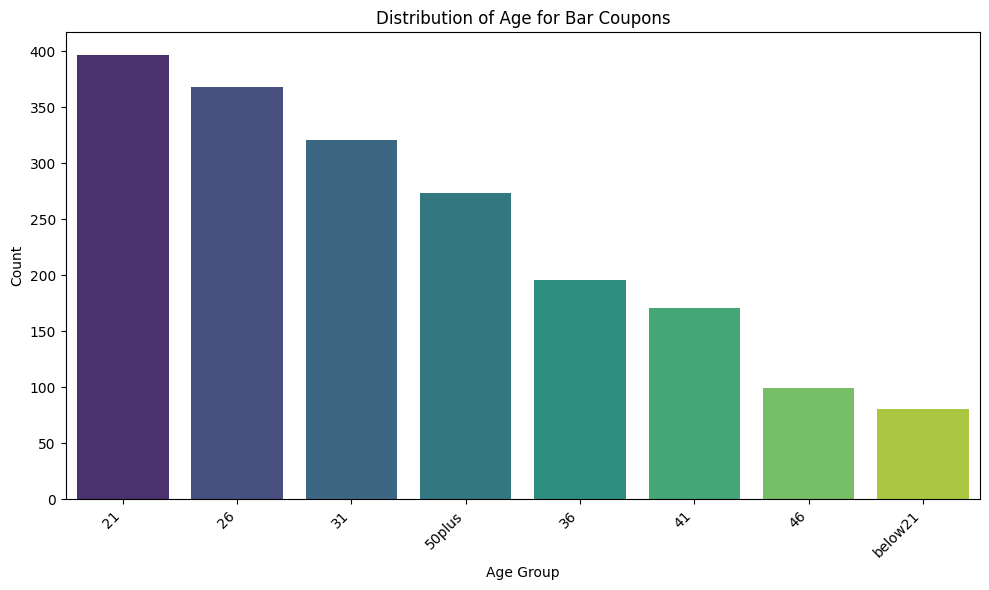

In [91]:
# Bar plot of age distribution for bar coupons
plt.figure(figsize=(10, 6))
sns.countplot(data=data_bar_coupons, x='age', order=data_bar_coupons['age'].value_counts().index, palette='viridis')
plt.title('Distribution of Age for Bar Coupons')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [92]:
# Map 'age' categories to a representative numeric value for comparison
def map_age_to_numeric(age_str):
    if age_str == 'below21':
        return 20
    elif age_str == '50plus':
        return 50
    else:
        return int(age_str)

data_bar_coupons['age_numeric'] = data_bar_coupons['age'].apply(map_age_to_numeric)

# Identify drivers who go to a bar more than once a month
# '1~3', '4~8', 'gt8' represent more than once a month
data_bar_coupons['goes_bar_more_than_once_month'] = data_bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])

# Identify drivers who are over 25
data_bar_coupons['is_over_25'] = data_bar_coupons['age_numeric'] > 25

# Define the target group: goes to bar more than once a month AND is over 25
data_bar_coupons['target_group'] = (data_bar_coupons['goes_bar_more_than_once_month']) & (data_bar_coupons['is_over_25'])

# Calculate acceptance rates for the target group and others
acceptance_rate_target_group = data_bar_coupons[data_bar_coupons['target_group']]['Y'].mean()
acceptance_rate_others = data_bar_coupons[~data_bar_coupons['target_group']]['Y'].mean()

print(f"Acceptance rate for drivers who go to a bar more than once a month and are over 25: {acceptance_rate_target_group:.2f}")
print(f"Acceptance rate for all other drivers: {acceptance_rate_others:.2f}")

# Compare and state the difference
if acceptance_rate_target_group > acceptance_rate_others:
    print(f"\nThere is a difference. The target group has a higher acceptance rate by {acceptance_rate_target_group - acceptance_rate_others:.2f}.")
elif acceptance_rate_target_group < acceptance_rate_others:
    print(f"\nThere is a difference. The target group has a lower acceptance rate by {acceptance_rate_others - acceptance_rate_target_group:.2f}.")
else:
    print("\nThere is no significant difference in acceptance rates between the groups.")

Acceptance rate for drivers who go to a bar more than once a month and are over 25: 0.69
Acceptance rate for all other drivers: 0.34

There is a difference. The target group has a higher acceptance rate by 0.35.


/tmp/ipython-input-761156466.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bar_coupons['age_numeric'] = data_bar_coupons['age'].apply(map_age_to_numeric)
/tmp/ipython-input-761156466.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bar_coupons['goes_bar_more_than_once_month'] = data_bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])
/tmp/ipython-input-761156466.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

* Acceptance rate for the target group (bar visitors > 1/month AND over 25): 69%
* Acceptance rate for all other drivers: 34%

**Conclusion :** There is a significant difference, with the target group showing a 35% higher acceptance rate for bar coupons. This suggests that this specific demographic is much more likely to accept a bar coupon.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.

In [93]:
# Create a copy to avoid SettingWithCopyWarning
bar_coupons_analysis = data_bar_coupons.copy()

# Condition 1: goes to bars more than once a month (already identified in previous step, but re-applying on copy)
bar_coupons_analysis['goes_bar_more_than_once_month'] = bar_coupons_analysis['Bar'].isin(['1~3', '4~8', 'gt8'])

# Condition 2: had passengers that were not a kid
# 'passanger' column values: 'Alone', 'Friend(s)', 'Kid(s)', 'Partner', 'Other'
bar_coupons_analysis['not_kid_passenger'] = ~bar_coupons_analysis['passanger'].isin(['Kid(s)'])

# Condition 3: occupations other than farming, fishing, or forestry
occupations_to_exclude = ['Farming, fishing, and forestry']
bar_coupons_analysis['occupation_not_excluded'] = ~bar_coupons_analysis['occupation'].isin(occupations_to_exclude)

# Define the new target group
bar_coupons_analysis['new_target_group'] = (
    bar_coupons_analysis['goes_bar_more_than_once_month'] &
    bar_coupons_analysis['not_kid_passenger'] &
    bar_coupons_analysis['occupation_not_excluded']
)

# Calculate acceptance rates for the new target group and all others
acceptance_rate_new_target_group = bar_coupons_analysis[bar_coupons_analysis['new_target_group']]['Y'].mean()
acceptance_rate_all_others = bar_coupons_analysis[~bar_coupons_analysis['new_target_group']]['Y'].mean()

print(f"Acceptance rate for new target group (bar >1/month, no kid, non-FFO occupation): {acceptance_rate_new_target_group:.2f}")
print(f"Acceptance rate for all other drivers: {acceptance_rate_all_others:.2f}")

# Compare and state the difference
if acceptance_rate_new_target_group > acceptance_rate_all_others:
    print(f"\nThere is a difference. The new target group has a higher acceptance rate by {acceptance_rate_new_target_group - acceptance_rate_all_others:.2f}.")
elif acceptance_rate_new_target_group < acceptance_rate_all_others:
    print(f"\nThere is a difference. The new target group has a lower acceptance rate by {acceptance_rate_all_others - acceptance_rate_new_target_group:.2f}.")
else:
    print("\nThere is no significant difference in acceptance rates between the groups.")

Acceptance rate for new target group (bar >1/month, no kid, non-FFO occupation): 0.71
Acceptance rate for all other drivers: 0.30

There is a difference. The new target group has a higher acceptance rate by 0.41.


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



/tmp/ipython-input-2292909369.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_clean, x='income', order=data_clean['income'].value_counts().index, palette='crest')


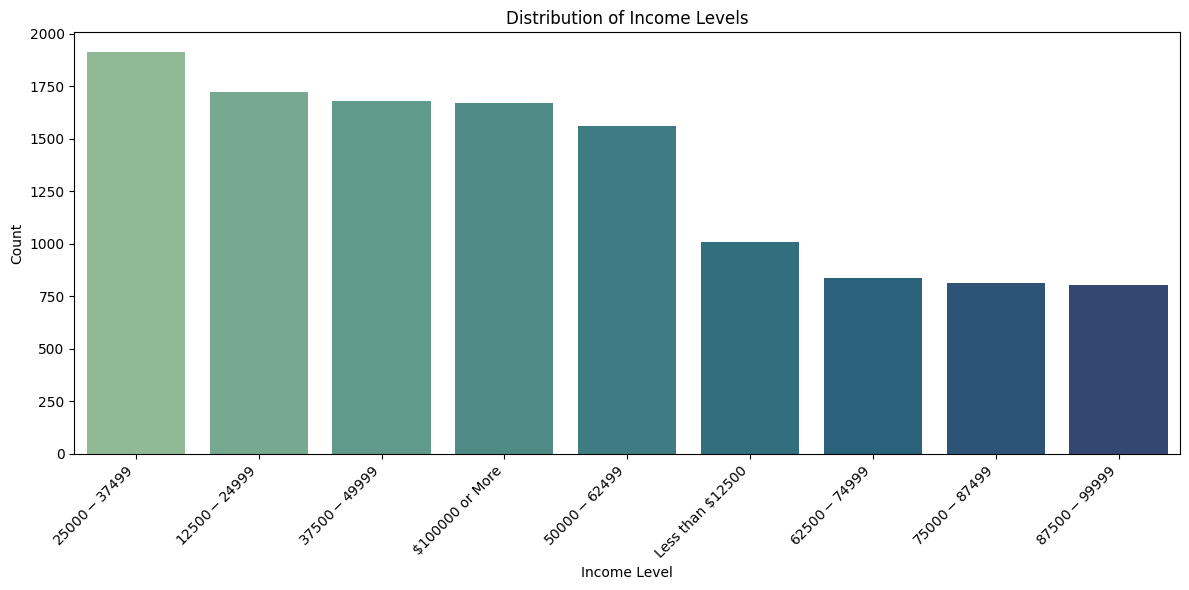

In [94]:
# Bar plot of 'income' column distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=data_clean, x='income', order=data_clean['income'].value_counts().index, palette='crest')
plt.title('Distribution of Income Levels')
plt.xlabel('Income Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

First step is to prepare  the `analysis_df` with numeric age and income.

In [95]:

# 1. Create a copy of the data_clean DataFrame
analysis_df = data_clean.copy()

# 2. Define a function to convert 'age' categories to numeric
def map_age_for_comparison(age_str):
    if pd.isna(age_str): # Handle potential NaN values
        return np.nan
    if age_str == 'below21':
        return 20
    elif age_str == '50plus':
        return 50
    else:
        try:
            return int(age_str)
        except ValueError: # Handle ranges like '21-25'
            return int(age_str.split('-')[0]) # Take the lower bound of the range

# 3. Apply the function to create 'age_numeric'
analysis_df['age_numeric'] = analysis_df['age'].apply(map_age_for_comparison)

# 4. Define a function to convert 'income' categories to numeric
def map_income_for_comparison(income_str):
    if pd.isna(income_str): # Handle potential NaN values
        return np.nan
    if income_str == 'Less than $12500':
        return 10000
    elif income_str == '$12500 - $24999':
        return 20000
    elif income_str == '$25000 - $37499':
        return 30000
    elif income_str == '$37500 - $49999':
        return 40000
    elif income_str == '$50000 - $62499':
        return 55000
    elif income_str == '$62500 - $74999':
        return 68000
    elif income_str == '$75000 - $99999':
        return 85000
    elif income_str == '$100000 or more':
        return 100000
    else:
        return np.nan # For any other unexpected values

# 5. Apply the function to create 'income_numeric'
analysis_df['income_numeric'] = analysis_df['income'].apply(map_income_for_comparison)

print("DataFrame 'analysis_df' created with 'age_numeric' and 'income_numeric' columns.")
print(analysis_df[['age', 'age_numeric', 'income', 'income_numeric']].head())

DataFrame 'analysis_df' created with 'age_numeric' and 'income_numeric' columns.
   age  age_numeric           income  income_numeric
22  21           21  $62500 - $74999         68000.0
23  21           21  $62500 - $74999         68000.0
24  21           21  $62500 - $74999         68000.0
25  21           21  $62500 - $74999         68000.0
26  21           21  $62500 - $74999         68000.0


 Now define the complex conditions for Group A, Group B, and Group C as outlined in the subtask instructions, combine these conditions using logical OR, and then calculate the acceptance rates for the combined target group versus all other drivers.



In [96]:
# Conditionals for Group A
# 'go to bars more than once a month'
condition_bar_freq_A = analysis_df['Bar'].isin(['1~3', '4~8', 'gt8'])
# 'had passengers that were not a kid'
condition_not_kid_passenger_A = ~analysis_df['passanger'].isin(['Kid(s)'])
# 'were not widowed'
condition_not_widowed_A = analysis_df['maritalStatus'] != 'Widowed'

group_A_condition = condition_bar_freq_A & condition_not_kid_passenger_A & condition_not_widowed_A

# Conditionals for Group B
# 'go to bars more than once a month' (same as condition_bar_freq_A)
# 'are under the age of 30'
condition_age_B = analysis_df['age_numeric'] < 30

group_B_condition = condition_bar_freq_A & condition_age_B

# Conditionals for Group C
# 'go to cheap restaurants more than 4 times a month' (RestaurantLessThan20)
condition_restaurant_freq_C = analysis_df['RestaurantLessThan20'].isin(['4~8', 'gt8'])
# 'income is less than 50K'
condition_income_C = analysis_df['income_numeric'] < 50000

group_C_condition = condition_restaurant_freq_C & condition_income_C

# Combine all target groups using logical OR
target_group_combined = group_A_condition | group_B_condition | group_C_condition

# Calculate acceptance rates
acceptance_rate_target_combined = analysis_df[target_group_combined]['Y'].mean()
acceptance_rate_others_combined = analysis_df[~target_group_combined]['Y'].mean()

print(f"Acceptance rate for the combined target group: {acceptance_rate_target_combined:.2f}")
print(f"Acceptance rate for all other drivers: {acceptance_rate_others_combined:.2f}")

# Explain the difference
if acceptance_rate_target_combined > acceptance_rate_others_combined:
    print(f"\nConclusion: The combined target group has a significantly higher acceptance rate by {acceptance_rate_target_combined - acceptance_rate_others_combined:.2f}.")
elif acceptance_rate_target_combined < acceptance_rate_others_combined:
    print(f"\nConclusion: The combined target group has a lower acceptance rate by {acceptance_rate_others_combined - acceptance_rate_target_combined:.2f}.")
else:
    print("\nConclusion: There is no significant difference in acceptance rates between the groups.")


Acceptance rate for the combined target group: 0.61
Acceptance rate for all other drivers: 0.54

Conclusion: The combined target group has a significantly higher acceptance rate by 0.06.


## Summary:

*   **What is the coupon acceptance rate for the combined target group?**
    The coupon acceptance rate for the combined target group is 0.61.
*   **What is the coupon acceptance rate for all other drivers?**
    The coupon acceptance rate for all other drivers is 0.54.
*   **How do the acceptance rates compare between the combined target group and all other drivers?**
    The combined target group has a significantly higher acceptance rate compared to all other drivers, with a difference of 0.06.

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on the observations from the analysis, Drivers who regularly frequent bars (more than once a month), are over the age of 25, and are typically without minor passengers (implying a social drinking context), are significantly more likely to accept bar coupons than other drivers. Their lifestyle, potentially including a higher disposable income and a tendency to dine out, further contributes to this increased acceptance rate.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

## Filter Data for 'Coffee House' Coupons




In [97]:
coffee_house_data = data_clean[data_clean['coupon'] == 'Coffee House']
print(f"Created 'coffee_house_data' DataFrame with {len(coffee_house_data)} rows.")
coffee_house_data.head()

Created 'coffee_house_data' DataFrame with 3809 rows.


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,0
27,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,1,0,0,1,0
28,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,1,0,0,1,0
30,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,0


In [98]:
overall_coffee_acceptance_rate = coffee_house_data['Y'].mean()
print(f"Overall Coffee House Coupon Acceptance Rate: {overall_coffee_acceptance_rate:.2f}")

Overall Coffee House Coupon Acceptance Rate: 0.50


Acceptance rate of Coffee House coupons by visitation frequency:


,coffee_frequency_category,Y
0,3 or fewer times/month,0.444932
1,more than 3 times/month,0.672556


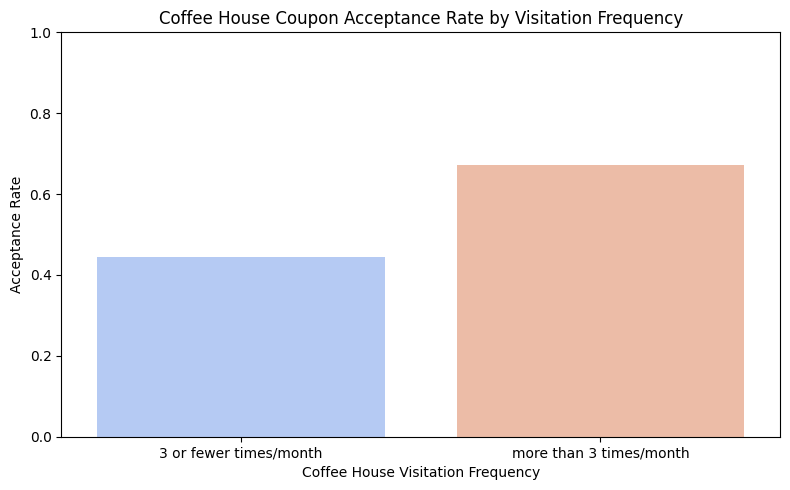

In [99]:
def categorize_coffee_house_frequency(frequency):
    if frequency in ['never', 'less1', '1~3']:
        return '3 or fewer times/month'
    elif frequency in ['4~8', 'gt8']:
        return 'more than 3 times/month'
    else:
        return 'unknown'

# Apply the categorization to create a new column, using .copy() to avoid SettingWithCopyWarning
coffee_house_data_copy = coffee_house_data.copy()
coffee_house_data_copy['coffee_frequency_category'] = coffee_house_data_copy['CoffeeHouse'].apply(categorize_coffee_house_frequency)

# Calculate acceptance rates for each category
acceptance_by_coffee_frequency = coffee_house_data_copy.groupby('coffee_frequency_category')['Y'].mean().reset_index()

print("Acceptance rate of Coffee House coupons by visitation frequency:")
display(acceptance_by_coffee_frequency)

# Visualize the acceptance rates
plt.figure(figsize=(8, 5))
sns.barplot(x='coffee_frequency_category', y='Y', hue='coffee_frequency_category', data=acceptance_by_coffee_frequency, palette='coolwarm', legend=False)
plt.title('Coffee House Coupon Acceptance Rate by Visitation Frequency')
plt.xlabel('Coffee House Visitation Frequency')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1) # Set y-axis limits from 0 to 1 for proportion
plt.tight_layout()
plt.show()

Acceptance rate of Coffee House coupons by Passenger Type:


,passanger,Y
0,Alone,0.433612
1,Friend(s),0.596760
2,Kid(s),0.468750
3,Partner,0.565517


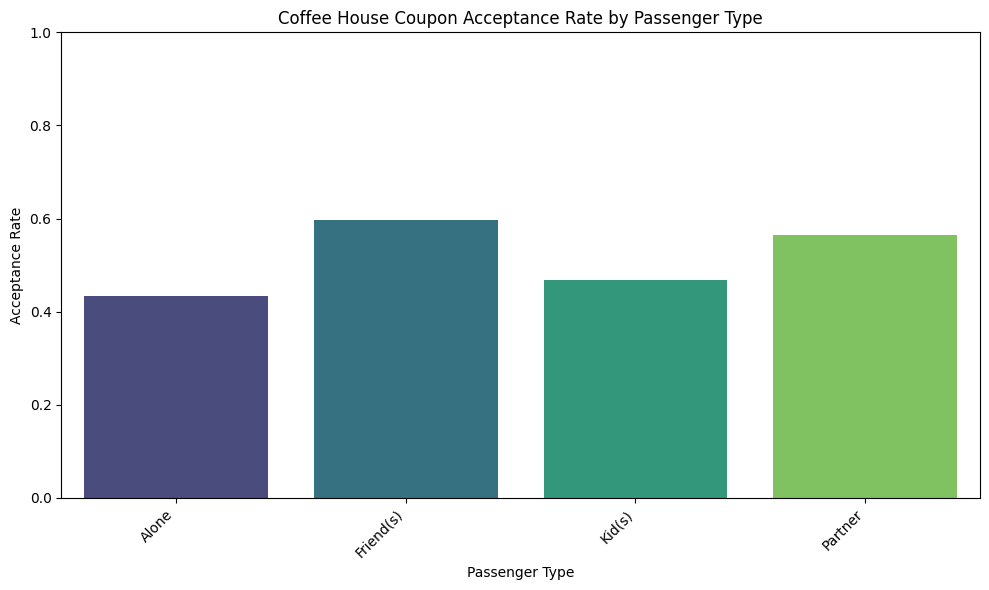

In [100]:
# Calculate acceptance rates by passenger type
acceptance_by_passenger = coffee_house_data_copy.groupby('passanger')['Y'].mean().reset_index()

print("Acceptance rate of Coffee House coupons by Passenger Type:")
display(acceptance_by_passenger)

# Visualize the acceptance rates
plt.figure(figsize=(10, 6))
sns.barplot(x='passanger', y='Y', hue='passanger', data=acceptance_by_passenger, palette='viridis', legend=False)
plt.title('Coffee House Coupon Acceptance Rate by Passenger Type')
plt.xlabel('Passenger Type')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1) # Set y-axis limits from 0 to 1 for proportion
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Acceptance rate of Coffee House coupons by Destination:


,destination,Y
0,Home,0.362302
1,No Urgent Place,0.577148
2,Work,0.440000


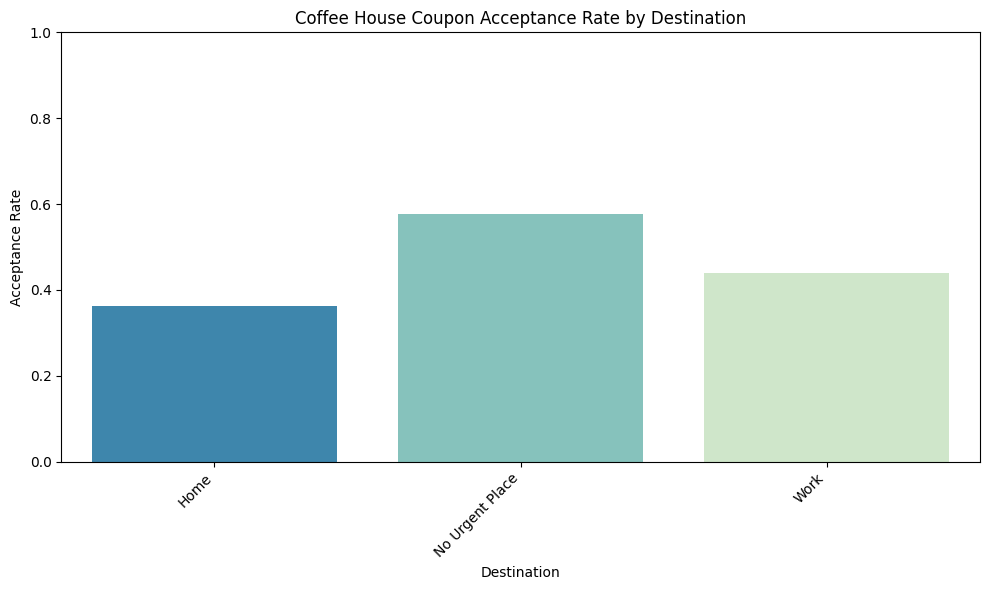

In [101]:
# Calculate acceptance rates by destination
acceptance_by_destination = coffee_house_data_copy.groupby('destination')['Y'].mean().reset_index()

print("Acceptance rate of Coffee House coupons by Destination:")
display(acceptance_by_destination)

# Visualize the acceptance rates
plt.figure(figsize=(10, 6))
sns.barplot(x='destination', y='Y', hue='destination', data=acceptance_by_destination, palette='GnBu_r', legend=False)
plt.title('Coffee House Coupon Acceptance Rate by Destination')
plt.xlabel('Destination')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1) # Set y-axis limits from 0 to 1 for proportion
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Acceptance rate of Coffee House coupons by Gender:


,gender,Y
0,Female,0.490336
1,Male,0.501356


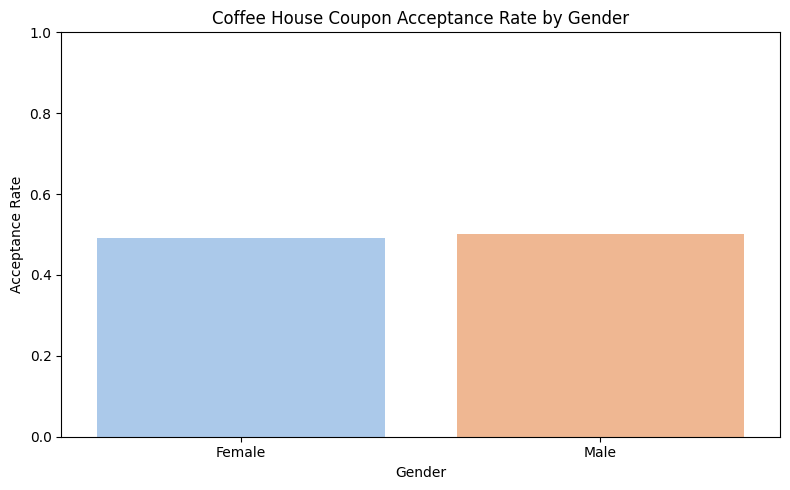

In [102]:
# Calculate acceptance rates by gender
acceptance_by_gender = coffee_house_data_copy.groupby('gender')['Y'].mean().reset_index()

print("Acceptance rate of Coffee House coupons by Gender:")
display(acceptance_by_gender)

# Visualize the acceptance rates
plt.figure(figsize=(8, 5))
sns.barplot(x='gender', y='Y', hue='gender', data=acceptance_by_gender, palette='pastel', legend=False)
plt.title('Coffee House Coupon Acceptance Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1) # Set y-axis limits from 0 to 1 for proportion
plt.tight_layout()
plt.show()

Acceptance rate of Coffee House coupons by Age:


,age,Y
0,21,0.517773
1,26,0.513174
2,31,0.481164
3,36,0.468586
4,41,0.492114
5,46,0.502347
6,50plus,0.419660
7,below21,0.678322


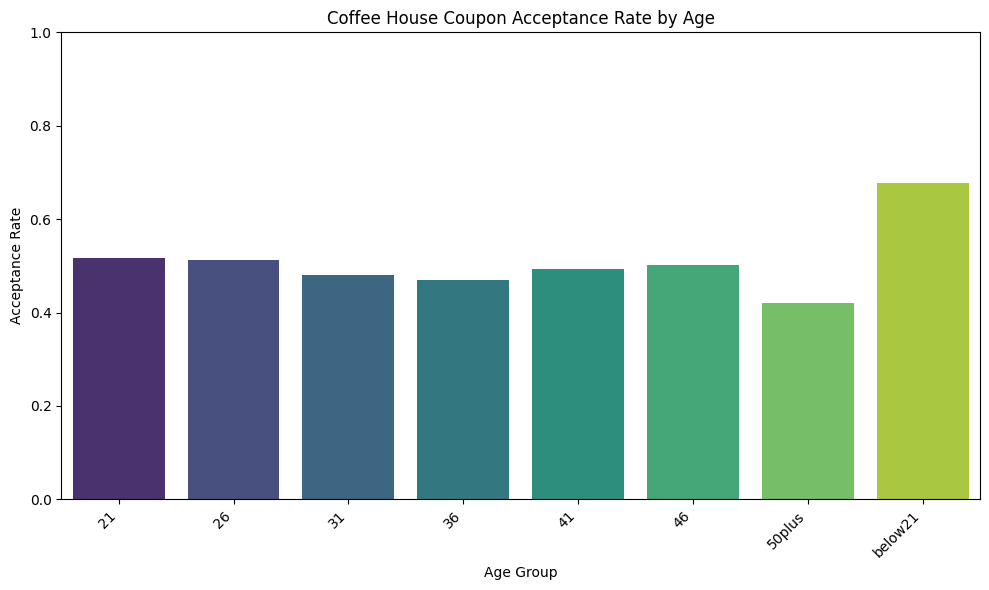

In [103]:
# Calculate acceptance rates by age
acceptance_by_age = coffee_house_data_copy.groupby('age')['Y'].mean().reset_index()

print("Acceptance rate of Coffee House coupons by Age:")
display(acceptance_by_age)

# Visualize the acceptance rates
plt.figure(figsize=(10, 6))
sns.barplot(x='age', y='Y', hue='age', data=acceptance_by_age, palette='viridis', legend=False)
plt.title('Coffee House Coupon Acceptance Rate by Age')
plt.xlabel('Age Group')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1) # Set y-axis limits from 0 to 1 for proportion
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Acceptance rate of Coffee House coupons by Weather:


,weather,Y
0,Rainy,0.516279
1,Snowy,0.429577
2,Sunny,0.500000


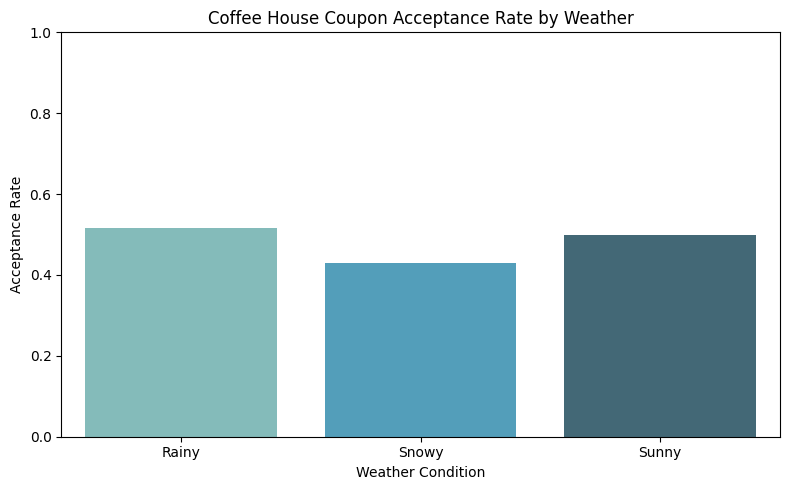

In [104]:
# Calculate acceptance rates by weather
acceptance_by_weather = coffee_house_data_copy.groupby('weather')['Y'].mean().reset_index()

print("Acceptance rate of Coffee House coupons by Weather:")
display(acceptance_by_weather)

# Visualize the acceptance rates
plt.figure(figsize=(8, 5))
sns.barplot(x='weather', y='Y', hue='weather', data=acceptance_by_weather, palette='GnBu_d', legend=False)
plt.title('Coffee House Coupon Acceptance Rate by Weather')
plt.xlabel('Weather Condition')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1) # Set y-axis limits from 0 to 1 for proportion
plt.tight_layout()
plt.show()

Acceptance rate of Coffee House coupons by Time of Day:


,time,Y
0,10AM,0.634346
1,10PM,0.429078
2,2PM,0.544855
3,6PM,0.410405
4,7AM,0.440000


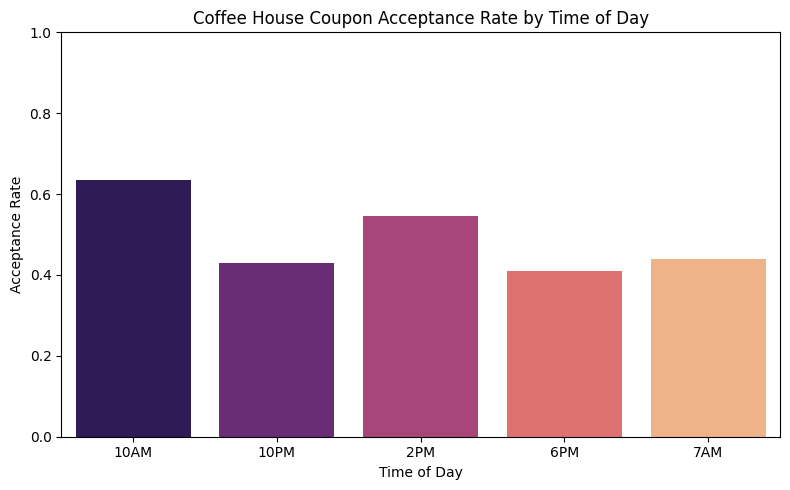

In [105]:
# Calculate acceptance rates by time of day
acceptance_by_time = coffee_house_data_copy.groupby('time')['Y'].mean().reset_index()

print("Acceptance rate of Coffee House coupons by Time of Day:")
display(acceptance_by_time)

# Visualize the acceptance rates
plt.figure(figsize=(8, 5))
sns.barplot(x='time', y='Y', hue='time', data=acceptance_by_time, palette='magma', legend=False)
plt.title('Coffee House Coupon Acceptance Rate by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1) # Set y-axis limits from 0 to 1 for proportion
plt.tight_layout()
plt.show()

## Summary of Independent Investigation: Coffee House Coupons

### Key Findings:

1.  **Overall Acceptance Rate**: Approximately 50% of coffee house coupons were accepted.

2.  **Coffee House Visitation Frequency**: Drivers who visit coffee houses `more than 3 times/month` show a significantly higher acceptance rate ~67% compared to those who visit `3 or fewer times/month` ~44%. This indicates that frequent visitors are much more receptive.

3.  **Passenger Type**: Acceptance rates are highest when the driver has `Friend(s)` ~60% or a `Partner` ~57% as passengers. Acceptance is lower when driving `Alone` ~43% or with `Kid(s)` ~47%. This suggests a social aspect to coffee coupon acceptance.

4.  **Destination**: Coupons are more likely to be accepted when the destination is `No Urgent Place` ~58% or `Work` ~44%, and least likely when heading `Home` ~36%. This implies that coupons are more effective during commutes or leisure activities.

5.  **Age**: Younger drivers, particularly those `below21` ~68% and `21` years old ~52%, show the highest acceptance rates. The acceptance rate generally decreases with increasing age.

6.  **Time of Day**: Acceptance rates peak at `10AM` ~63% and `2PM` ~54%, aligning with typical morning and afternoon coffee breaks.

7.  **Weather**: `Rainy` weather ~52% acceptance shows a slightly higher acceptance rate than `Sunny` ~50% or `Snowy` ~43% conditions, possibly due to a desire for a warm beverage.

8.  **Gender**: There is no significant difference in acceptance rates between `Female` ~49% and `Male` ~50% drivers.

### Conslusion for Coffee House Coupon Acceptance:

Drivers are more likely to accept a Coffee House coupon if they are:

*   **Frequent coffee house visitors** (visiting more than 3 times a month).
*   Accompanied by **friends or a partner**.
*   Not driving towards **home**, but rather to a `No Urgent Place` or `Work`.
*   From **younger age groups** (especially below 21 and 21 years old).
*   Receiving the coupon during **morning (10 AM) or afternoon (2 PM)** hours.
*   Driving in **rainy weather**.